In [13]:
import tensorflow
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [14]:


health_data =  pd.read_csv('../merged_final_data_clean.csv')

In [15]:
print(health_data.columns)

Index(['TIME', 'PATIENT', 'Age', 'Gender', 'Race', 'Triglycerides',
       'How many family members  including yourself  do you currently live with?',
       'Hemoglobin [Mass/volume] in Blood', 'Body Mass Index',
       'Low Density Lipoprotein Cholesterol', 'Calcium', 'Are you a refugee?',
       'In the past year  have you or any family members you live with been unable to get any of the following when it was really needed?',
       'Total Cholesterol',
       'Stress is when someone feels tense  nervous  anxious or can't sleep at night because their mind is troubled. How stressed are you?',
       'High Density Lipoprotein Cholesterol', 'Carbon Dioxide',
       'Are you worried about losing your housing?',
       'Platelets [#/volume] in Blood by Automated count', 'Body Height',
       'How often do you see or talk to people that you care about and feel close to (For example: talking to friends on the phone  visiting friends or family  going to church or club meetings)?',
       'C

In [106]:
columns_to_encode = ['Tobacco smoking status NHIS',  
                    "Stress is when someone feels tense  nervous  anxious or can't sleep at night because their mind is troubled. How stressed are you?", 
                     "Are you a refugee?", 
                     "In the past year  have you or any family members you live with been unable to get any of the following when it was really needed?",
                     "Are you worried about losing your housing?",
                     "What is your main insurance?",
                     "In the past year  have you spent more than 2 nights in a row in a jail  prison  detention center  or juvenile correctional facility?",
                     "What is your current work situation?",
                     "Are you Hispanic or Latino?",
                     "Do you feel physically and emotionally safe where you currently live?",
                     "What is the highest level of school that you have finished?",
                     "Which race(s) are you?",
                     "In the past year  have you been afraid of your partner or ex-partner?",
                     "Has lack of transportation kept you from medical appointments  meetings  work  or from getting things needed for daily living?",
                     "What is your housing situation today?",
                     "Tobacco smoking status NHIS",
                     "At any point in the past 2 years  has season or migrant farm work been your or your family's main source of income?",
                     "Have you been discharged from the armed forces of the United States?",
                    "Gender", 
                     "Race",
                    "How often do you see or talk to people that you care about and feel close to (For example: talking to friends on the phone  visiting friends or family  going to church or club meetings)?"]

OHE    = OneHotEncoder(sparse=False)
encoded_columns =    OHE.fit_transform(health_data[columns_to_encode])
                     
                     

In [107]:
print(encoded_columns.shape)

(27408, 80)


In [108]:
column_name = OHE.get_feature_names(columns_to_encode)
one_hot_encoded_frame =  pd.DataFrame(encoded_columns, columns= column_name)

In [109]:
only_scalar = health_data.drop(columns_to_encode, axis=1)


In [110]:
only_scalar_filtered_frame =only_scalar.drop(['TIME','PATIENT'], axis=1) #filter time and patient
final_frame = pd.concat([one_hot_encoded_frame,only_scalar_filtered_frame], axis=1)

In [111]:
encoded_full_column_list = final_frame.columns

In [112]:
final_frame.to_csv("./feature_selection/final_Frame.csv")

Shuffle the dataset.

In [113]:
from sklearn.utils import shuffle

processed_data = shuffle(final_frame).values

In [114]:
X = processed_data[:,:-1].astype(float)
y = processed_data[:,-1].astype(int)


In [115]:
hyper_label = list(np.where(y==1)[0])
non_hyper_label = np.where(y==0)[0]
new_non_hyper_label = list(np.random.choice(non_hyper_label, size = int(len(hyper_label))))
new_label_indices = hyper_label + new_non_hyper_label
y_balanced = y[new_label_indices]
X_balanced =X[new_label_indices]

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2, f_classif

scaler_x = StandardScaler().fit(X_balanced)
X_balanced = scaler_x.transform(X_balanced)
print(X_balanced)

kbest = SelectKBest(f_classif, k=20)
X_new = kbest.fit_transform(X_balanced, y_balanced)
X_new.shape

[[-0.65008361  0.65008361 -0.59523494 ... -0.99801539 -1.25264864
  -0.04205501]
 [-0.65008361  0.65008361 -0.59523494 ... -0.19531678 -0.99582388
  -0.93947238]
 [-0.65008361  0.65008361 -0.59523494 ... -0.03477706  0.03147516
  -0.54062022]
 ...
 [ 1.53826368 -1.53826368  1.6800089  ...  0.36657224  0.09568135
  -0.54062022]
 [-0.65008361  0.65008361 -0.59523494 ... -0.67693595 -0.2253496
  -0.34119414]
 [ 1.53826368 -1.53826368 -0.59523494 ... -1.15855511 -1.12423626
  -1.23861151]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [26 57] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


(818, 20)

In [118]:
kbest.scores_

array([1.46027201e-01, 1.46027201e-01, 1.01021356e-01, 1.00369004e+00,
       1.82455094e-01, 1.11570672e+00, 7.57350757e-03, 2.20434626e-01,
       1.00000000e+00, 5.54682779e+00, 4.93690579e+00, 4.04160475e-01,
       1.61904762e+00, 3.89416194e-01, 5.01173773e-02, 4.29112326e-01,
       9.19333033e-02, 4.04160475e-01, 9.53907816e-01, 6.15692636e-32,
       8.84994143e-03, 9.06706965e-03, 1.51621622e+01, 2.46400000e+02,
       1.12763819e+01, 7.67704413e+01,            nan, 6.20938028e+01,
       6.20938028e+01, 3.57532861e+00, 1.00369004e+00, 2.71796615e+00,
       1.59929603e+00, 2.70646766e-01, 1.43763214e-01, 1.43763214e-01,
       1.00000000e+00, 1.02344630e+00, 2.00787402e-01, 9.22821270e-01,
       1.24392304e+01, 2.00491400e+00, 1.34762386e+01, 1.46278285e+00,
       2.00787402e-01, 7.06417686e+00, 1.55548554e+00, 5.04950495e+00,
       1.12087912e-01, 3.33878887e-01, 5.90256657e+00, 2.96296296e-01,
       2.96296296e-01, 1.41617494e+00, 1.10136321e-01, 1.68160742e+00,
      

In [119]:
cols = kbest.get_support(indices=True)
print(cols)
best_columns_data_frame = final_frame.iloc[:,cols]



[ 22  23  24  25  27  28  40  42  69  74  80  81  83  85  87  88  98 101
 106 107]


In [120]:
encoded_full_column_list = final_frame.columns
full_column_dict = {}
encoded_full_column_list = list(encoded_full_column_list)

encoded_full_column_list.remove('Hypertension')

i=0
for _ in range(0,len(encoded_full_column_list)):
    
    full_column_dict[encoded_full_column_list[_]] = kbest.scores_[i]
    i +=1
    

print(encoded_full_column_list[80])
print(kbest.scores_[80])

Age
791.0713636637112


In [121]:
import csv
#sort dictionary based on values
sorted_full_column_dict = {k: v for k, v in sorted(full_column_dict.items(), key=lambda item: item[1], reverse=True)}
#print(sorted_full_column_dict)

with open('./feature_selection/scaled_feature_selection_importance_sorted_fclassif.csv', 'w') as csv_file:  
    writer = csv.writer(csv_file)
    for key, value in sorted_full_column_dict.items():
       writer.writerow([key, value])

In [122]:
best_columns_data_frame.to_csv('./feature_selection/best_columns_data_frame.csv')

In [123]:
 X_train, X_test, y_train, y_test = train_test_split(X_new, y_balanced, test_size=0.1)

In [124]:
X_train.shape

(736, 20)

In [125]:
print(X_train.dtype)

float64


In [126]:
unique, counts = np.unique(y_test, return_counts=True)
print("test:",dict(zip(unique, counts)))


unique, counts = np.unique(y_train, return_counts=True)
print("train:",dict(zip(unique, counts)))

test: {0: 40, 1: 42}
train: {0: 369, 1: 367}


Fully connected neural network model with 3 hidden layers:

In [134]:
import tensorflow as tf 

model = tf.keras.models.Sequential([
  tf.keras.Input(shape=(X_train[0].shape[0],)), #Xtrain[0].shape[0] = 108 -> input size
  tf.keras.layers.Dense(10, activation='relu'), #represents 1st hidden layer 
  tf.keras.layers.Dropout(0.2), # dropout regularization with dropout probability 20% percent
  tf.keras.layers.Dense(10, activation='relu'), #represents the 2nd hidden layer 
  tf.keras.layers.Dropout(0.2), # dropout regularization with dropout probability 20% percent
  tf.keras.layers.Dense(10, activation='relu'), #represents the 3rd hidden layer 
  tf.keras.layers.Dropout(0.2), # dropout regularization with dropout probability 20% percent
  tf.keras.layers.Dense(1, activation='sigmoid') # sigmoid activation at output since it is binary classification
])

In [135]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [136]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_24 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_25 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_26 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                

Train the model with 10 epochs:

In [137]:
r2 = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=500)

Epoch 1/500
23/23 [==============================] - 1s 20ms/step - loss: 0.7053 - accuracy: 0.5346 - val_loss: 0.6306 - val_accuracy: 0.7317
Epoch 2/500
23/23 [==============================] - 0s 5ms/step - loss: 0.6698 - accuracy: 0.6021 - val_loss: 0.6139 - val_accuracy: 0.7683
Epoch 3/500
23/23 [==============================] - 0s 6ms/step - loss: 0.6355 - accuracy: 0.6880 - val_loss: 0.5896 - val_accuracy: 0.7683
Epoch 4/500
23/23 [==============================] - 0s 5ms/step - loss: 0.6231 - accuracy: 0.6511 - val_loss: 0.5595 - val_accuracy: 0.7805
Epoch 5/500
23/23 [==============================] - 0s 6ms/step - loss: 0.6069 - accuracy: 0.6553 - val_loss: 0.5319 - val_accuracy: 0.7805
Epoch 6/500
23/23 [==============================] - 0s 5ms/step - loss: 0.5839 - accuracy: 0.6897 - val_loss: 0.5087 - val_accuracy: 0.7805
Epoch 7/500
23/23 [==============================] - 0s 5ms/step - loss: 0.5370 - accuracy: 0.7344 - val_loss: 0.4838 - val_accuracy: 0.7927
Epoch 8/500


Epoch 59/500
23/23 [==============================] - 0s 7ms/step - loss: 0.3187 - accuracy: 0.8672 - val_loss: 0.4077 - val_accuracy: 0.7805
Epoch 60/500
23/23 [==============================] - 0s 7ms/step - loss: 0.3060 - accuracy: 0.8618 - val_loss: 0.4038 - val_accuracy: 0.7805
Epoch 61/500
23/23 [==============================] - 0s 8ms/step - loss: 0.3189 - accuracy: 0.8679 - val_loss: 0.4037 - val_accuracy: 0.7805
Epoch 62/500
23/23 [==============================] - 0s 8ms/step - loss: 0.3113 - accuracy: 0.8912 - val_loss: 0.4059 - val_accuracy: 0.7805
Epoch 63/500
23/23 [==============================] - 0s 6ms/step - loss: 0.2846 - accuracy: 0.8761 - val_loss: 0.4031 - val_accuracy: 0.7805
Epoch 64/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3109 - accuracy: 0.8770 - val_loss: 0.4004 - val_accuracy: 0.7927
Epoch 65/500
23/23 [==============================] - 0s 6ms/step - loss: 0.2868 - accuracy: 0.8922 - val_loss: 0.3992 - val_accuracy: 0.7805
Epoch 

23/23 [==============================] - 0s 5ms/step - loss: 0.2623 - accuracy: 0.9015 - val_loss: 0.4131 - val_accuracy: 0.7927
Epoch 117/500
23/23 [==============================] - 0s 6ms/step - loss: 0.3001 - accuracy: 0.8704 - val_loss: 0.4054 - val_accuracy: 0.7927
Epoch 118/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2570 - accuracy: 0.9107 - val_loss: 0.4061 - val_accuracy: 0.7927
Epoch 119/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2360 - accuracy: 0.9152 - val_loss: 0.4043 - val_accuracy: 0.8049
Epoch 120/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2922 - accuracy: 0.8734 - val_loss: 0.4067 - val_accuracy: 0.7927
Epoch 121/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2577 - accuracy: 0.8967 - val_loss: 0.4092 - val_accuracy: 0.7927
Epoch 122/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2909 - accuracy: 0.8902 - val_loss: 0.4088 - val_accuracy: 0.8049
Epoch 123/500

23/23 [==============================] - 0s 6ms/step - loss: 0.2309 - accuracy: 0.9246 - val_loss: 0.4244 - val_accuracy: 0.7927
Epoch 174/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2353 - accuracy: 0.8885 - val_loss: 0.4260 - val_accuracy: 0.7927
Epoch 175/500
23/23 [==============================] - 0s 6ms/step - loss: 0.2211 - accuracy: 0.9156 - val_loss: 0.4246 - val_accuracy: 0.7927
Epoch 176/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2604 - accuracy: 0.8852 - val_loss: 0.4277 - val_accuracy: 0.8049
Epoch 177/500
23/23 [==============================] - 0s 6ms/step - loss: 0.2656 - accuracy: 0.8839 - val_loss: 0.4344 - val_accuracy: 0.7927
Epoch 178/500
23/23 [==============================] - 0s 10ms/step - loss: 0.2131 - accuracy: 0.9098 - val_loss: 0.4451 - val_accuracy: 0.7927
Epoch 179/500
23/23 [==============================] - 0s 6ms/step - loss: 0.2284 - accuracy: 0.9173 - val_loss: 0.4391 - val_accuracy: 0.7927
Epoch 180/50

23/23 [==============================] - 0s 8ms/step - loss: 0.2396 - accuracy: 0.9019 - val_loss: 0.4828 - val_accuracy: 0.7683
Epoch 231/500
23/23 [==============================] - 0s 8ms/step - loss: 0.2071 - accuracy: 0.9069 - val_loss: 0.4917 - val_accuracy: 0.7683
Epoch 232/500
23/23 [==============================] - 0s 10ms/step - loss: 0.2255 - accuracy: 0.9099 - val_loss: 0.4780 - val_accuracy: 0.7805
Epoch 233/500
23/23 [==============================] - 0s 6ms/step - loss: 0.1964 - accuracy: 0.9258 - val_loss: 0.4914 - val_accuracy: 0.7805
Epoch 234/500
23/23 [==============================] - 0s 7ms/step - loss: 0.2511 - accuracy: 0.8932 - val_loss: 0.4821 - val_accuracy: 0.7927
Epoch 235/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2497 - accuracy: 0.9024 - val_loss: 0.4732 - val_accuracy: 0.7927
Epoch 236/500
23/23 [==============================] - 0s 7ms/step - loss: 0.1987 - accuracy: 0.9216 - val_loss: 0.4762 - val_accuracy: 0.7927
Epoch 237/50

23/23 [==============================] - 0s 6ms/step - loss: 0.2360 - accuracy: 0.8986 - val_loss: 0.5633 - val_accuracy: 0.7683
Epoch 288/500
23/23 [==============================] - 0s 6ms/step - loss: 0.1880 - accuracy: 0.9399 - val_loss: 0.5633 - val_accuracy: 0.7683
Epoch 289/500
23/23 [==============================] - 0s 8ms/step - loss: 0.2376 - accuracy: 0.9163 - val_loss: 0.5492 - val_accuracy: 0.7805
Epoch 290/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2392 - accuracy: 0.8926 - val_loss: 0.5510 - val_accuracy: 0.7805
Epoch 291/500
23/23 [==============================] - 0s 8ms/step - loss: 0.1988 - accuracy: 0.9221 - val_loss: 0.5384 - val_accuracy: 0.7805
Epoch 292/500
23/23 [==============================] - 0s 11ms/step - loss: 0.2108 - accuracy: 0.9054 - val_loss: 0.5362 - val_accuracy: 0.7805
Epoch 293/500
23/23 [==============================] - 0s 10ms/step - loss: 0.1812 - accuracy: 0.9196 - val_loss: 0.5411 - val_accuracy: 0.7805
Epoch 294/5

23/23 [==============================] - 0s 6ms/step - loss: 0.2161 - accuracy: 0.9040 - val_loss: 0.6215 - val_accuracy: 0.7927
Epoch 345/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2073 - accuracy: 0.9029 - val_loss: 0.6111 - val_accuracy: 0.7805
Epoch 346/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2129 - accuracy: 0.9166 - val_loss: 0.6027 - val_accuracy: 0.7927
Epoch 347/500
23/23 [==============================] - 0s 6ms/step - loss: 0.2150 - accuracy: 0.9234 - val_loss: 0.6104 - val_accuracy: 0.7805
Epoch 348/500
23/23 [==============================] - 0s 6ms/step - loss: 0.1773 - accuracy: 0.9210 - val_loss: 0.6145 - val_accuracy: 0.7805
Epoch 349/500
23/23 [==============================] - 0s 5ms/step - loss: 0.1807 - accuracy: 0.9281 - val_loss: 0.6256 - val_accuracy: 0.7805
Epoch 350/500
23/23 [==============================] - 0s 5ms/step - loss: 0.1846 - accuracy: 0.9340 - val_loss: 0.6154 - val_accuracy: 0.7805
Epoch 351/500

23/23 [==============================] - 0s 5ms/step - loss: 0.2138 - accuracy: 0.9081 - val_loss: 0.6909 - val_accuracy: 0.7927
Epoch 402/500
23/23 [==============================] - 0s 5ms/step - loss: 0.2043 - accuracy: 0.9053 - val_loss: 0.6887 - val_accuracy: 0.7805
Epoch 403/500
23/23 [==============================] - 0s 5ms/step - loss: 0.1842 - accuracy: 0.9215 - val_loss: 0.6831 - val_accuracy: 0.7805
Epoch 404/500
23/23 [==============================] - 0s 6ms/step - loss: 0.1798 - accuracy: 0.9145 - val_loss: 0.6975 - val_accuracy: 0.7805
Epoch 405/500
23/23 [==============================] - 0s 6ms/step - loss: 0.1861 - accuracy: 0.9312 - val_loss: 0.6924 - val_accuracy: 0.7927
Epoch 406/500
23/23 [==============================] - 0s 6ms/step - loss: 0.1789 - accuracy: 0.9249 - val_loss: 0.6858 - val_accuracy: 0.7805
Epoch 407/500
23/23 [==============================] - 0s 6ms/step - loss: 0.1832 - accuracy: 0.9317 - val_loss: 0.6879 - val_accuracy: 0.7805
Epoch 408/500

23/23 [==============================] - 0s 10ms/step - loss: 0.1860 - accuracy: 0.9177 - val_loss: 0.7303 - val_accuracy: 0.7927
Epoch 459/500
23/23 [==============================] - 0s 8ms/step - loss: 0.1814 - accuracy: 0.9218 - val_loss: 0.7648 - val_accuracy: 0.7927
Epoch 460/500
23/23 [==============================] - 0s 7ms/step - loss: 0.1742 - accuracy: 0.9273 - val_loss: 0.7850 - val_accuracy: 0.7927
Epoch 461/500
23/23 [==============================] - 0s 7ms/step - loss: 0.2074 - accuracy: 0.9088 - val_loss: 0.7919 - val_accuracy: 0.7927
Epoch 462/500
23/23 [==============================] - 0s 7ms/step - loss: 0.2163 - accuracy: 0.9087 - val_loss: 0.7807 - val_accuracy: 0.7927
Epoch 463/500
23/23 [==============================] - 0s 7ms/step - loss: 0.1704 - accuracy: 0.9343 - val_loss: 0.7662 - val_accuracy: 0.7927
Epoch 464/500
23/23 [==============================] - 0s 8ms/step - loss: 0.1583 - accuracy: 0.9446 - val_loss: 0.7930 - val_accuracy: 0.7927
Epoch 465/50

Plot the losses:

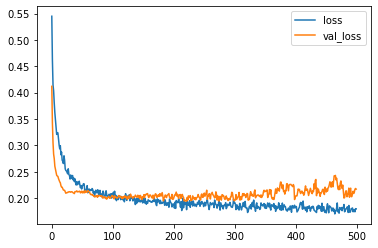

In [131]:
plt.plot(r2.history['loss'], label='loss')
plt.plot(r2.history['val_loss'], label='val_loss')
plt.legend()

Plot the accuracies:

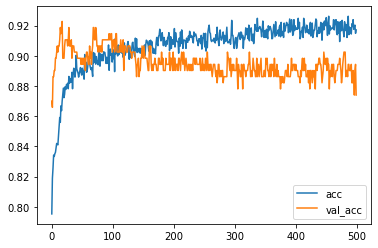

In [132]:
plt.plot(r2.history['accuracy'], label='acc')
plt.plot(r2.history['val_accuracy'], label='val_acc')
plt.legend()

In [133]:
print(model.evaluate(X_test, y_test))

3/3 [==============================] - 0s 3ms/step - loss: 1.9292 - accuracy: 0.8171
[1.9291783571243286, 0.8170731663703918]


In [68]:
model.save_weights('../weights/best25_features/')


**Applying this dataset on different models to create benchmarks to compare with Fully Connected model:**

*Logistic Regression* **(linear classifier):**

In [144]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))



0.9855272226051
0.9839474644290405


In [145]:
for i in range(X_train[0].shape[0]):
 print("weight for the feature",i,":",model.coef_[0][i])

model.coef_[0].sort()

print("sorted list, positive weights contribute MORE TO DETERMINE potential hypertension case and negative features conribute more to make prediction as NOT hypertension. So we can say 0 valued weights do not contribute to anything:",model.coef_[0])

weight for the feature 0 : -0.14062803342902322
weight for the feature 1 : -1.2777877443869474
weight for the feature 2 : -0.1924020139720983
weight for the feature 3 : 0.5718029200074063
weight for the feature 4 : 0.3560056996565792
weight for the feature 5 : -0.23070698219064653
weight for the feature 6 : 0.25028154428778243
weight for the feature 7 : 0.18873072083680678
weight for the feature 8 : 0.4902295177004325
weight for the feature 9 : -0.0665091673947505
weight for the feature 10 : -0.47675102277296727
weight for the feature 11 : -1.9470404286153262
weight for the feature 12 : 0.051944551894377175
weight for the feature 13 : -0.4042504128423456
weight for the feature 14 : 0.19640437523974202
weight for the feature 15 : 0.05145719700109458
weight for the feature 16 : 0.03281525125110459
weight for the feature 17 : -0.4082345788292435
weight for the feature 18 : 0.27028397726075043
weight for the feature 19 : 0.07994595644640681
sorted list, positive weights contribute MORE TO 

*Decision Tree*  

In [146]:
from sklearn.tree import DecisionTreeClassifier
model =DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))

1.0
0.977745348412988


*AdaBoost*

In [147]:
from sklearn.ensemble import AdaBoostClassifier
model =AdaBoostClassifier()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))

0.986135322495642
0.9850419554906968


In [148]:
unique, counts = np.unique(y_test, return_counts=True)
print("test:",dict(zip(unique, counts)))


unique, counts = np.unique(y_train, return_counts=True)
print("train:",dict(zip(unique, counts)))

test: {0: 2697, 1: 44}
train: {0: 24302, 1: 365}


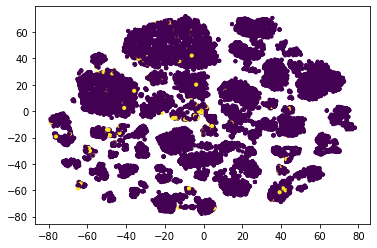

In [151]:
# Visualize the data (tsne is great but slow.)

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
transformed = tsne.fit_transform(X_train)

#visualize in the 2d
plt.scatter(transformed[:,0], transformed[:,1], c=y_train, s=10) #take first two columns in order to get 2d plot.
plt.show()

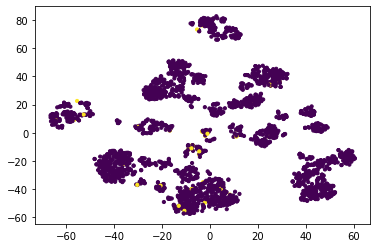

In [152]:
transformed = tsne.fit_transform(X_test)

# visualize the clouds in 2-D
plt.scatter(transformed[:,0], transformed[:,1], c=y_test, s=10) #take first two columns in order to get 2d plot.
plt.show()